In [1]:
import numpy as np
from scipy.optimize import leastsq

In [2]:
#待拟合函数
def boltzmann(p,x):
    #p 待拟合参数
    A1,A2,x0,dx = p
    y = (A1-A2)/(1+np.exp((x-x0)/dx))+A2 #待拟合函数
    return y

def error(p,x,y):
    return boltzmann(p,x)-y

# 待拟合数据    
X = np.array(range(0,51,5))
y = [112,135,145,201,298,365,472,556,634,646,615]
y = np.array(y)
#参数初始值    
p0 = [1,3,2,1]
p_fit,_ = leastsq(error,p0,args=(X,y))

In [3]:
from functools import partial

In [4]:
boltz_fit = partial(boltzmann,p=p_fit)

In [5]:
from Chemometrics.import_common import *
%matplotlib inline

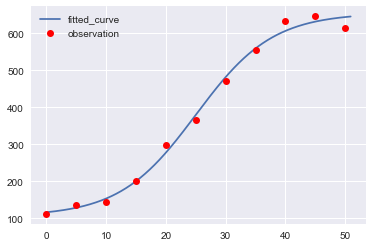

In [6]:
x_ = np.arange(0,51,.1)
plt.plot(x_,boltz_fit(x=x_),'-',label='fitted_curve')
plt.plot(X,y,'or',label='observation')
plt.legend()